# Exercice 3
<b>Estimating MEDV value using a regression model </b>

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

data = pd.read_csv('housing.data.txt')
# displaying shape
print("data shape : ", data.shape)
# displaying data
data.head()

data shape :  (506, 14)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
print(data.keys())

Index(['CIRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [3]:

#Add a Regression node to the stream and select MEDV as the target variable and all other variables as the Input
X = data.drop("MEDV", axis=1)

y = data["MEDV"].to_numpy() # vector y
print('X:', np.shape(X), 'y:', np.shape(y))

X: (506, 13) y: (506,)


In [4]:
#  train_test_split() fonction for separartion
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,shuffle=True,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (354, 13) X_test: (152, 13)


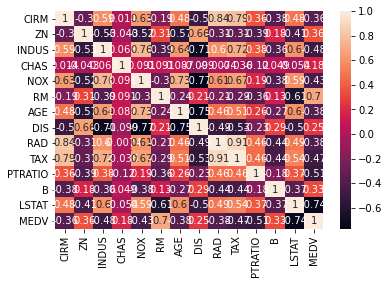

In [5]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

In [6]:
# Fitting the training data to our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [7]:
regressor.score(X_test, y_test)

0.7465447294386824

In [8]:
from sklearn.metrics import mean_squared_error, r2_score 


y_pred = regressor.predict(X_train)
#Evaluation 
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

y_pred = regressor.predict(X_test)
#Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.7243205129585508  et RMSE= 4.689057002428236
Testing: R2= 0.7465447294386824  et RMSE= 4.9079100957699975


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
print(LinearRegression().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [10]:

# K-fold cross-validation, GridSearchCV
pipelines = []
params = []
names = []

# LinearRegression
pipelines.append(Pipeline([('clf', LinearRegression())])) 
params.append({'clf__normalize':[True]})
names.append('LinearRegression')


In [11]:
#  cross-validation training

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=2, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training on all training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

LinearRegression R2: 0.6968620486406257
